# Gather data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('DATA1.csv')

In [3]:
df.head(10)

,Packet,SYNs Packet,ACKs Packet,DDoS
0,519895,249549,77984,Yes
1,737622,317177,118019,Yes
2,746776,649695,37338,Yes
3,572592,515332,28629,Yes
4,456384,228192,59329,Yes
5,485894,330407,77743,Yes
6,796965,741177,39848,Yes
7,441322,260379,48545,Yes
8,584089,473112,70090,Yes
9,628355,383296,81686,Yes


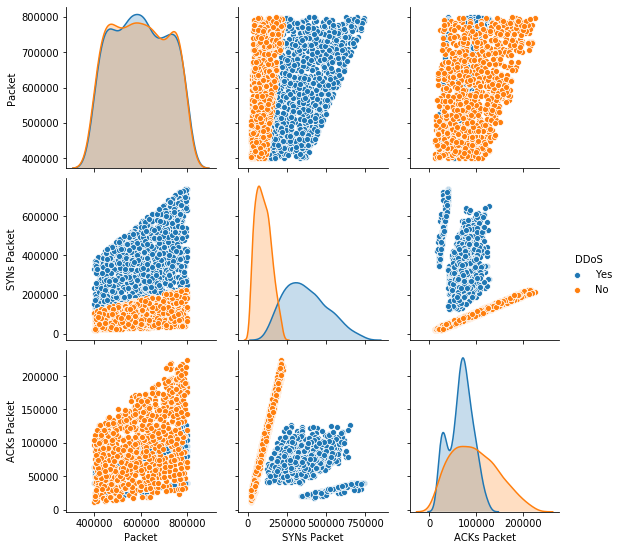

In [4]:
sns.pairplot(df, hue='DDoS')

In [5]:
df.dtypes

Packet          int64
SYNs Packet     int64
ACKs Packet     int64
DDoS           object
dtype: object

In [6]:
df.isnull().sum(axis=1).sum()

0

# Feature Engineering

In [7]:
num_data = df.select_dtypes(include=['number']) 
class_target = df.DDoS

In [8]:
transform_num_data = pd.concat([num_data], axis=1)
transform_num_data.head()

,Packet,SYNs Packet,ACKs Packet
0,519895,249549,77984
1,737622,317177,118019
2,746776,649695,37338
3,572592,515332,28629
4,456384,228192,59329


# Train and Test

In [9]:
X = transform_num_data
Y = class_target

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

# Normalization

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

# Create Model & Evaluation

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

from sklearn import metrics 

# # DT

In [13]:
dtree = DecisionTreeClassifier()
dtree.fit( X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
p1 = dtree.predict(X_test)

In [15]:
print("Decision Tree model accuracy:", metrics.accuracy_score(y_test, p1)*100 ,"%")

Decision Tree model accuracy: 100.0 %


# # KNN


In [16]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,11))
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=5) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    print(k, cv_results['test_score'].mean())

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0


In [17]:
knn = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [18]:
p2 = knn.predict( X_test )

In [19]:
print("K Nearest Neighbors model accuracy:", metrics.accuracy_score(y_test, p2)*100 ,"%")

K Nearest Neighbors model accuracy: 100.0 %


# # RF

In [20]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
p3 = rfc.predict( X_test )

In [22]:
print("Random Forest model accuracy:", metrics.accuracy_score(y_test, p3)*100 ,"%")

Random Forest model accuracy: 100.0 %


# Prediction

In [23]:
dtree.predict([[768164,459886,140355]])

array(['Yes'], dtype=object)

In [24]:
knn.predict([[768164,321451,70454]])

array(['Yes'], dtype=object)

In [25]:
rfc.predict([[768164,454534,46760]])

array(['Yes'], dtype=object)

In [26]:
#########################################################################

In [27]:
X_new = pd.read_csv('DDOS-TEST.csv')  # (1) read new instances
X_new.head(5)

,Packet,SYNs Packet,ACKs Packet
0,705960,325339,10609
1,508947,228492,30703
2,452669,316675,5476
3,631857,324357,17341
4,532230,447310,3577


In [31]:
dtree.predict(X_new)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No'], dtype=object)

In [32]:
knn.predict(X_new)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No'], dtype=object)

In [33]:
rfc.predict(X_new)

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No'], dtype=object)